#Case introduction
Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy.

However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that “the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”

The client provided KPMG with 3 datasets: Customer Demographic

Customer Addresses
Transactions data


In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

## Data loading and cleaning

In [9]:
transaction_df=pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx','Transactions')

In [10]:
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [11]:
transaction_df.columns=transaction_df.iloc[0]
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [12]:
transaction_df.drop(index=transaction_df.index[0],axis=0,inplace=True)
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [13]:
transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


## Checking and working with missing value

In [14]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB
None


In [15]:
print(transaction_df.isnull().values.sum())

1542


In [16]:
transaction_df=transaction_df.replace(" ",np.NaN)
transaction_df=transaction_df.fillna(transaction_df.mean())
print(transaction_df.isnull().values.sum())

788


<ipython-input-16-498a1d7ede0f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  transaction_df=transaction_df.fillna(transaction_df.mean())


In [17]:
transaction_df.drop_duplicates(inplace=True)

In [18]:
transaction_df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [19]:
for col in transaction_df.columns:
  if transaction_df[col].dtypes=='object':
    transaction_df[col]=transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
print(transaction_df.isnull().values.sum())
print(transaction_df.info())

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000

# Assigned the cohorts and calculated the monthly offset

In [20]:
dt.datetime(transaction_df['transaction_date'][1].year,transaction_df['transaction_date'][1].month,1)

datetime.datetime(2017, 2, 1, 0, 0)

In [21]:
def get_month(x):
  return dt.datetime(x.year,x.month,1)
transaction_df['TransactionMonth']=transaction_df['transaction_date'].apply(get_month)
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-01
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-01
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-01
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-01


In [22]:
transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')

1       2017-02-01
2       2017-01-01
3       2017-01-01
4       2017-02-01
5       2017-01-01
           ...    
19996   2017-01-01
19997   2017-01-01
19998   2017-04-01
19999   2017-02-01
20000   2017-03-01
Name: TransactionMonth, Length: 20000, dtype: datetime64[ns]

In [23]:
grouping=transaction_df.groupby('customer_id')['TransactionMonth']
transaction_df['CohortMonth']=grouping.transform('min')
print(transaction_df.head())

0  transaction_id  product_id  customer_id transaction_date online_order  \
1               1           2         2950       2017-02-25        False   
2               2           3         3120       2017-05-21         True   
3               3          37          402       2017-10-16        False   
4               4          88         3135       2017-08-31        False   
5               5          78          787       2017-10-01         True   

0 order_status           brand product_line product_class product_size  \
1     Approved           Solex     Standard        medium       medium   
2     Approved   Trek Bicycles     Standard        medium        large   
3     Approved      OHM Cycles     Standard           low       medium   
4     Approved  Norco Bicycles     Standard        medium       medium   
5     Approved  Giant Bicycles     Standard        medium        large   

0  list_price  standard_cost  product_first_sold_date TransactionMonth  \
1       71.49          5

# Calculating time offset in Month as Cohort Index

In [24]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `InvoiceDay` column
transaction_year, transaction_month, _ = get_date_int(transaction_df, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(transaction_df, 'CohortMonth')

Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two. This will be our month's offset or cohort Index, which we will use in the next section to calculate the retention rate.

In [25]:
#  Get the  difference in years
years_diff = transaction_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
transaction_df['CohortIndex'] = years_diff * 12 + months_diff  + 1
transaction_df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01,10


In [26]:
cohort_data=transaction_df.groupby(['CohortMonth','CohortIndex']).nunique()['customer_id'].reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


# Calculate business metrics:Retention rate

In [27]:
cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='customer_id')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention=cohort_counts.divide(cohort_sizes,axis=0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1.0,0.358936,0.375185,0.375923,0.370753,0.356721,0.382570,0.390694,0.369276,0.392171,0.367061,0.381093
2017-02-01,1.0,0.406250,0.372500,0.391250,0.360000,0.372500,0.385000,0.351250,0.411250,0.385000,0.370000,NaN
2017-03-01,1.0,0.345041,0.359504,0.345041,0.376033,0.380165,0.355372,0.438017,0.390496,0.373967,NaN,NaN
2017-04-01,1.0,0.330357,0.360119,0.455357,0.425595,0.360119,0.422619,0.375000,0.392857,NaN,NaN,NaN
2017-05-01,1.0,0.404762,0.385714,0.414286,0.338095,0.352381,0.347619,0.385714,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.368852,0.360656,0.385246,0.377049,0.377049,0.434426,NaN,NaN,NaN,NaN,NaN
2017-07-01,1.0,0.337662,0.376623,0.415584,0.480519,0.311688,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1.0,0.372549,0.411765,0.333333,0.254902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,1.0,0.304348,0.304348,0.391304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
retention=retention.round(3)*100
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizing the retention rate

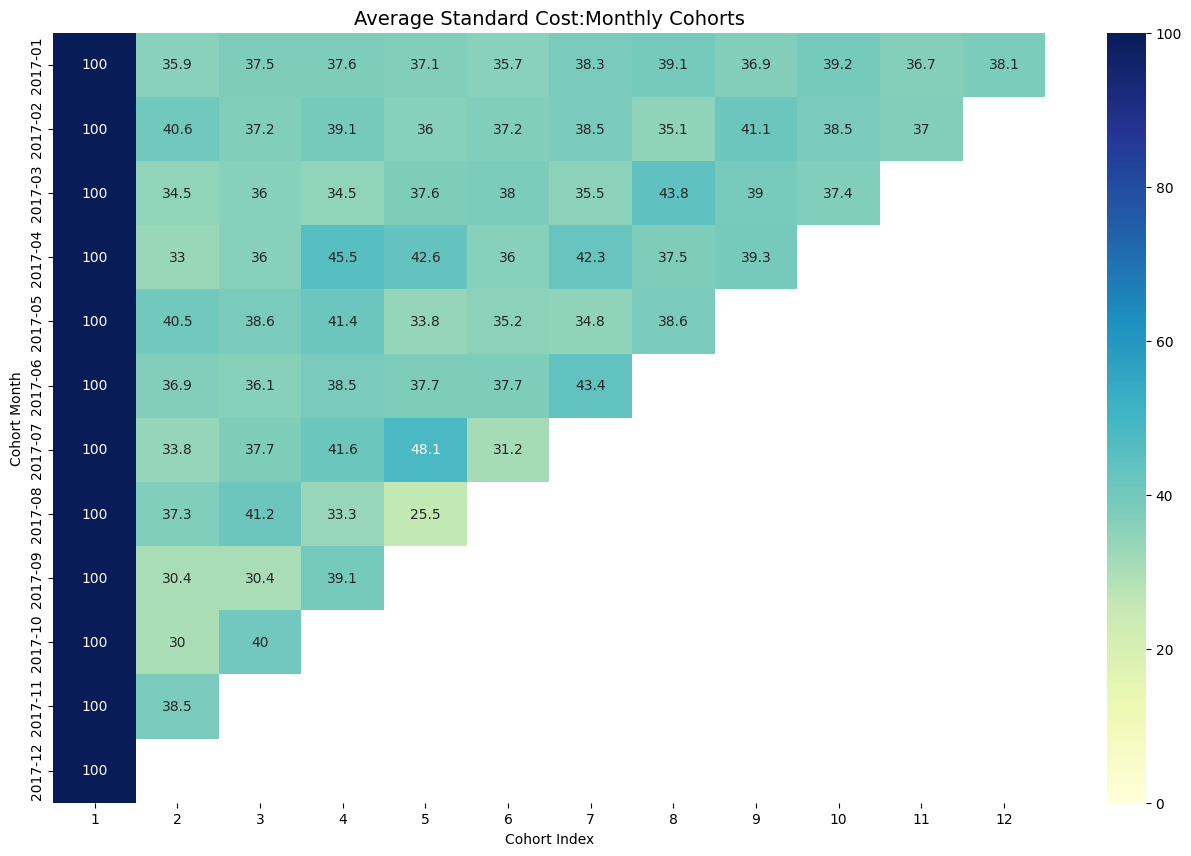

In [30]:
retention.index = retention.index.strftime('%Y-%m')
plt.figure(figsize=(16, 10))
plt.title('Average Standard Cost:Monthly Cohorts', fontsize = 14)

sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.show()

The value at CohortMonth 2017-01-01, CohortIndex 3 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in the 3rd Month.
Also, you can see from the retention Rate DataFrame:
Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month

The retention rate may increase or decrease in subsequent Indexes.

Here, We have 12 cohorts for each month and 12 cohort indexes. The darker the blue shades higher the values. Thus, if we see in 2017-07 cohort Month in 5th Cohort Index, we see the dark blue shade with 48% which means that 48% of cohorts that signed in July 2017 were active 5 months later.
This concludes our Cohort analysis for the retention rate.

# EDA

## Data loading "CustomerDemographic"

In [31]:
customers_df=pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx','CustomerDemographic')

<ipython-input-31-e108ab7ad9b8>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customers_df=pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx','CustomerDemographic')


In [32]:
customers_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaT,123.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaT,123.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaT,123.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaT,123.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [33]:
customers_df.drop_duplicates(inplace=True)

In [34]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  3999 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [35]:
t_c_df=customers_df.merge(transaction_df, how ='left', on = 'customer_id')

In [36]:
t_c_df

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,...,Solex,Road,medium,small,1703.52,1516.13,40649.0,2017-07-01,2017-02-01,6.0
1,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,...,Norco Bicycles,Standard,low,medium,958.74,748.90,38693.0,2017-08-01,2017-02-01,7.0
2,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,...,Solex,Touring,medium,large,2083.94,675.03,41533.0,2017-04-01,2017-02-01,3.0
3,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,...,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0,2017-02-01,2017-02-01,1.0
4,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,...,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0,2017-06-01,2017-02-01,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20499,3435,Stevena Allcock,Female,80,2002-01-15,21.0,Senior Editor,NaN,Affluent Customer,N,...,Solex,Standard,medium,medium,1163.89,589.27,42560.0,2017-08-01,2017-01-01,8.0
20500,3435,Stevena Allcock,Female,80,2002-01-15,21.0,Senior Editor,NaN,Affluent Customer,N,...,Solex,Standard,medium,large,1071.23,380.74,35160.0,2017-01-01,2017-01-01,1.0
20501,3435,Stevena Allcock,Female,80,2002-01-15,21.0,Senior Editor,NaN,Affluent Customer,N,...,Trek Bicycles,Road,low,small,1720.70,1531.42,38991.0,2017-02-01,2017-01-01,2.0
20502,3949,Costa Sleightholm,Male,24,2001-12-19,21.0,Web Designer IV,Manufacturing,High Net Worth,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


In [37]:
t_c_df['Gross']= round(t_c_df['list_price'] - t_c_df['standard_cost'])
print(t_c_df)

       customer_id               name  gender  \
0               34  Jephthah Bachmann       U   
1               34  Jephthah Bachmann       U   
2               34  Jephthah Bachmann       U   
3               34  Jephthah Bachmann       U   
4               34  Jephthah Bachmann       U   
...            ...                ...     ...   
20499         3435    Stevena Allcock  Female   
20500         3435    Stevena Allcock  Female   
20501         3435    Stevena Allcock  Female   
20502         3949  Costa Sleightholm    Male   
20503         3997      Blanch Nisuis  Female   

       past_3_years_bike_related_purchases        DOB   age        job_title  \
0                                       59 1843-12-21   NaN  Legal Assistant   
1                                       59 1843-12-21   NaN  Legal Assistant   
2                                       59 1843-12-21   NaN  Legal Assistant   
3                                       59 1843-12-21   NaN  Legal Assistant   
4          

In [38]:
brand_groupby=t_c_df.groupby('brand')['Gross'].sum()
print(brand_groupby)

brand
Giant Bicycles    1574094.0
Norco Bicycles     867794.0
OHM Cycles        1482883.0
Solex             2518605.0
Trek Bicycles     1837853.0
WeareA2B          2753569.0
Name: Gross, dtype: float64


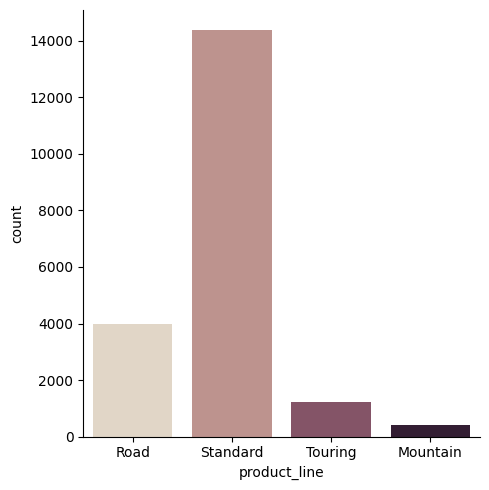

In [39]:
sns.catplot(data=t_c_df, x="product_line", kind="count", palette="ch:.25");

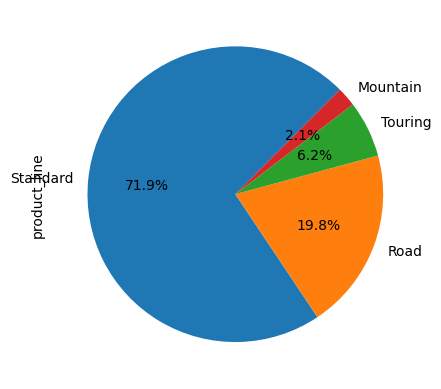

In [40]:
data=t_c_df['product_line'].value_counts()
data.plot.pie(autopct="%.1f%%",startangle=45);

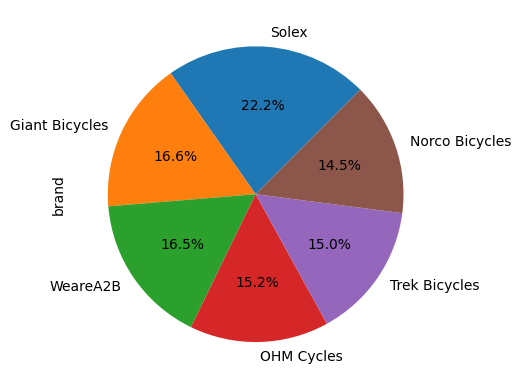

In [41]:
data=t_c_df['brand'].value_counts()
data.plot.pie(autopct="%.1f%%",startangle=45);

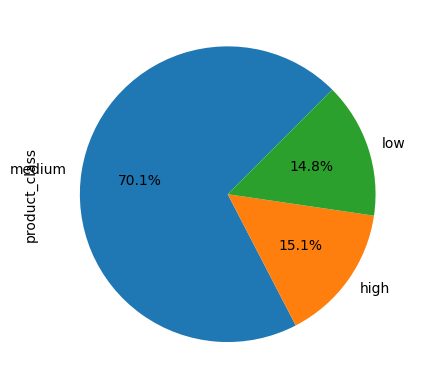

In [42]:
data=t_c_df['product_class'].value_counts()
data.plot.pie(autopct="%.1f%%",startangle=45);

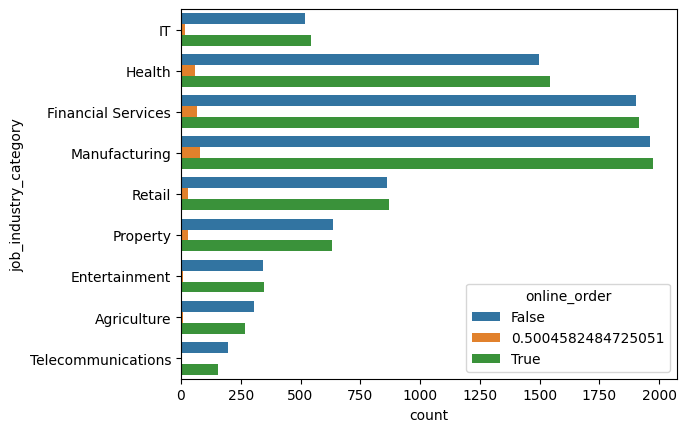

In [43]:
sns.countplot(y='job_industry_category',hue='online_order',data=t_c_df);

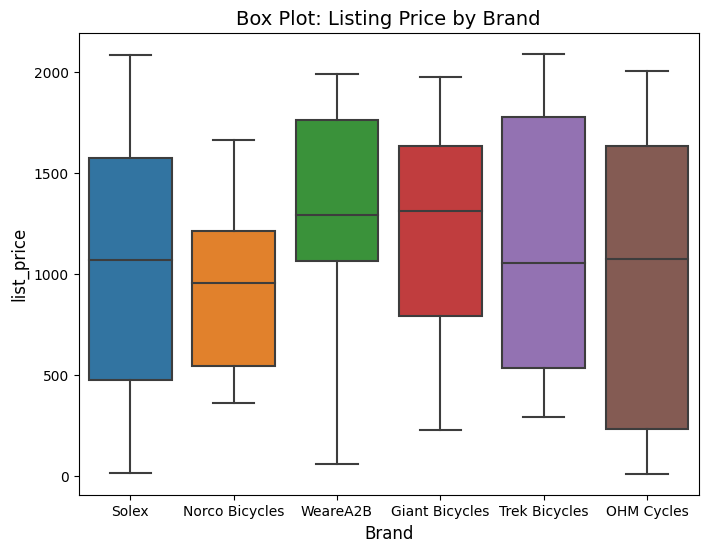

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='brand', y='list_price', data=t_c_df)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('list_price', fontsize=12)
plt.title('Box Plot: Listing Price by Brand', fontsize=14);
#wearea2b and giant bicyles avg price more hight


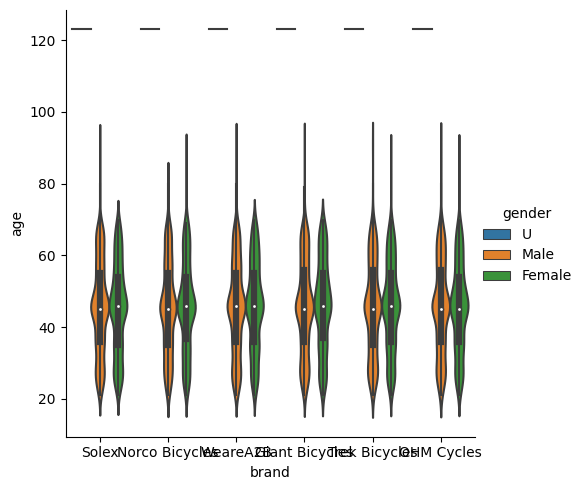

In [45]:
sns.catplot(
    data=t_c_df, x="brand", y="age", hue="gender", kind="violin",
)
#plt.xticks(rotation=45)

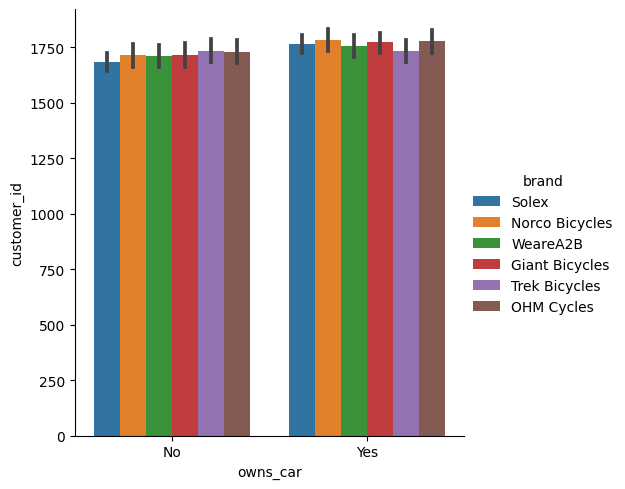

In [46]:
sns.catplot(data=t_c_df, x="owns_car", y="customer_id", hue="brand", kind="bar");

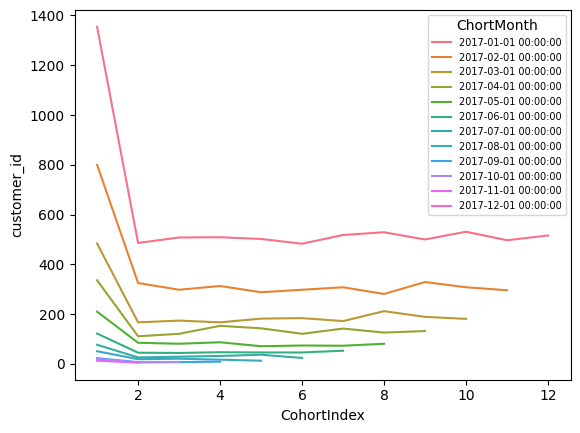

In [47]:
sns.lineplot(x = "CohortIndex", y = "customer_id",hue='CohortMonth', data=cohort_data)
plt.legend(loc='upper right',title='ChortMonth',fontsize=7)
plt.show()

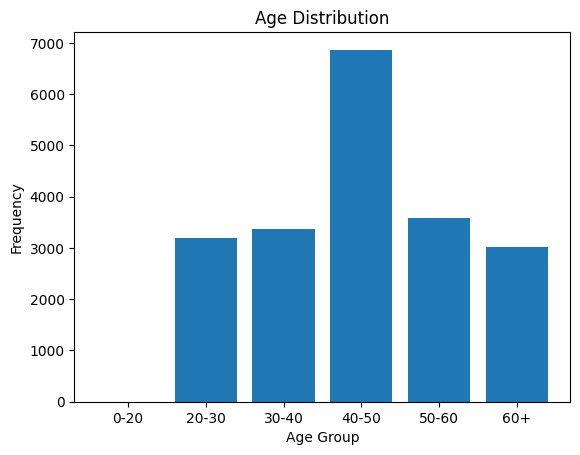

In [48]:
bins = [0,20, 30, 40, 50, 60, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']
t_c_df['AgeGroup'] = pd.cut(t_c_df['age'], bins=bins, labels=labels)
age_counts = t_c_df['AgeGroup'].value_counts().sort_index()

plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()
# Age > 40 has a large proprtion

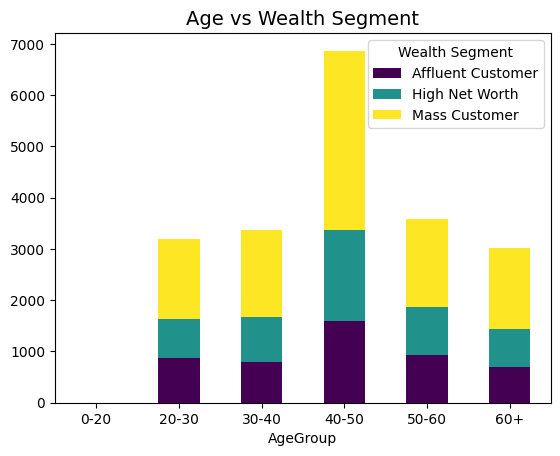

In [49]:
bins = [0,20, 30, 40, 50, 60, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']
t_c_df['AgeGroup'] = pd.cut(t_c_df['age'], bins=bins, labels=labels)
age_counts = t_c_df['AgeGroup'].value_counts().sort_index()
pivot_df = t_c_df.pivot_table(index='AgeGroup', columns='wealth_segment', aggfunc='size', fill_value=0)
# Create the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, cmap='viridis')
# Customize the plot
plt.title('Age vs Wealth Segment', fontsize=14)
plt.legend(title='Wealth Segment', fontsize=10)
plt.xticks(rotation=0)
plt.show();
#most of customers belong to 40-50 year-old

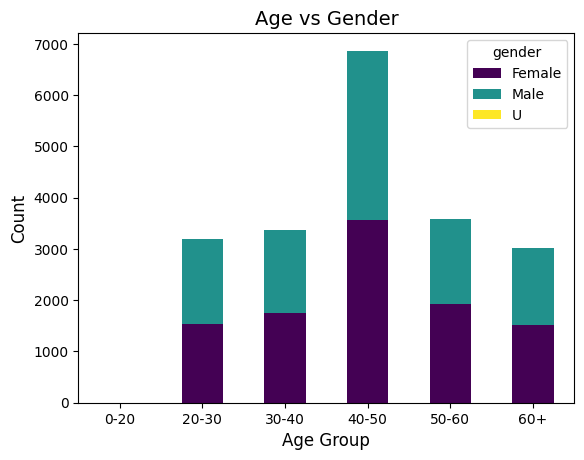

In [50]:
bins = [0,20, 30, 40, 50, 60, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']
t_c_df['AgeGroup'] = pd.cut(t_c_df['age'], bins=bins, labels=labels)
age_counts = t_c_df['AgeGroup'].value_counts().sort_index()
t_c_df_pivot_df = t_c_df.pivot_table(index='AgeGroup', columns='gender', aggfunc='size', fill_value=0)
# Create the stacked bar plot
t_c_df_pivot_df.plot(kind='bar', stacked=True, cmap='viridis')
# Customize the plot
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age vs Gender', fontsize=14)
plt.legend(title='gender', fontsize=10)
plt.xticks(rotation=0)
plt.show();

# Analyze two cohorts: 2017-11(48.1) vs 2017-12(31.2)

In [51]:
df_48 = transaction_df[(transaction_df['CohortMonth']== '2017-07-01')& (transaction_df['CohortIndex']==5)]

In [52]:
df_31 = transaction_df[(transaction_df['CohortMonth'] == '2017-07-01') & (transaction_df['CohortIndex'] == 6)]

In [53]:
df_48_customer=df_48.merge(customers_df, how ='left', on = 'customer_id')

In [54]:
df_31_customer=df_31.merge(customers_df, how ='left', on = 'customer_id')

In [55]:
df_48_customer['Gross']= round(df_48_customer['list_price'] - df_48_customer['standard_cost'])

In [56]:
brand_groupby=df_48_customer.groupby('brand')['Gross'].sum()
print(brand_groupby)
#ohm cycles/wearea2b/solex

brand
Giant Bicycles    3542.0
Norco Bicycles     268.0
OHM Cycles        4680.0
Solex             4340.0
Trek Bicycles     3734.0
WeareA2B          4502.0
Name: Gross, dtype: float64


In [57]:
df_31_customer['Gross']= round(df_31_customer['list_price'] - df_31_customer['standard_cost'])

In [58]:
brand_groupby=df_31_customer.groupby('brand')['Gross'].sum()
print(brand_groupby)
#wearea2b/solex/ohm cycles

brand
Giant Bicycles    1928.0
Norco Bicycles    1010.0
OHM Cycles        3594.0
Solex             3600.0
Trek Bicycles      393.0
WeareA2B          5887.0
Name: Gross, dtype: float64


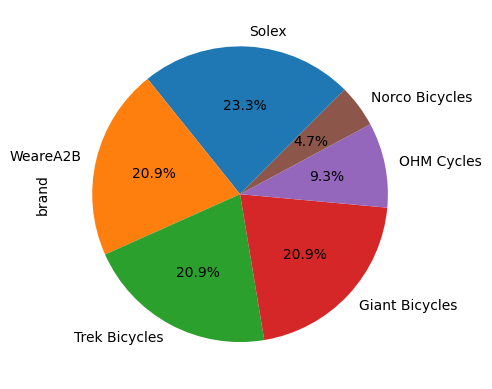

In [59]:
data=df_48_customer['brand'].value_counts()
data.plot.pie(autopct="%.1f%%",startangle=45);

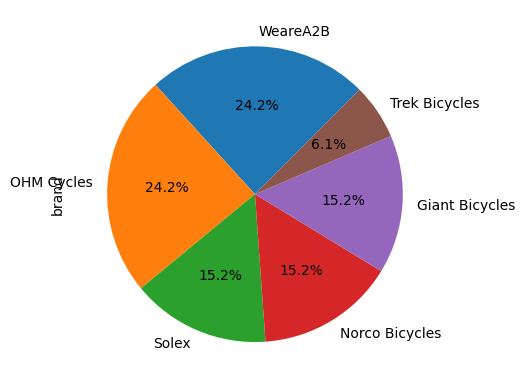

In [60]:
data=df_31_customer['brand'].value_counts()
data.plot.pie(autopct="%.1f%%",startangle=45);

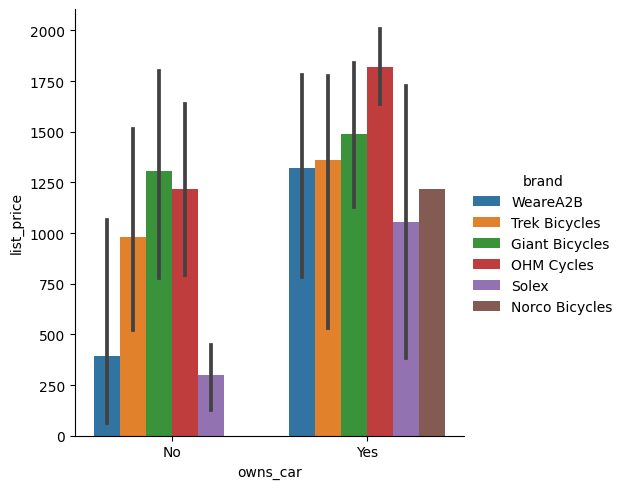

In [61]:
sns.catplot(data=df_48_customer, x="owns_car", y="list_price", hue="brand", kind="bar");

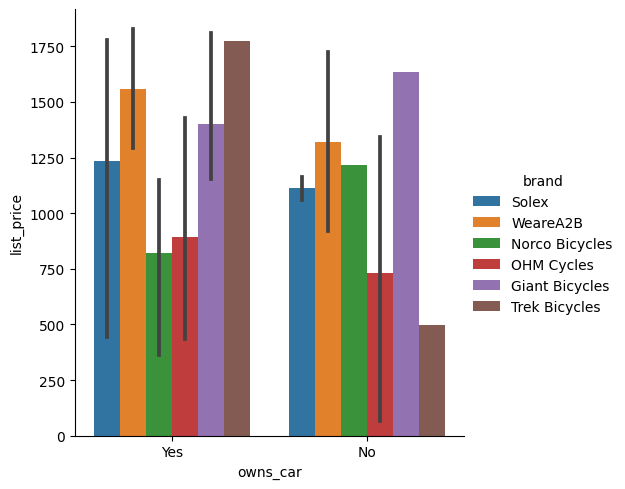

In [62]:
sns.catplot(data=df_31_customer, x="owns_car", y="list_price", hue="brand", kind="bar");

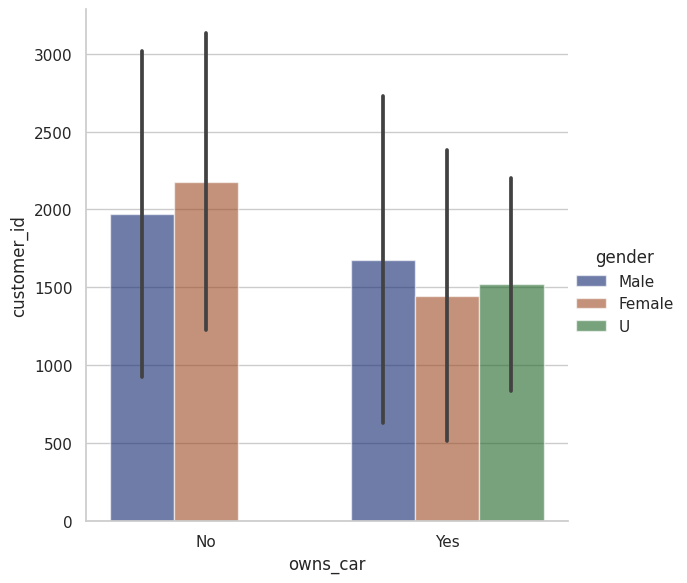

In [63]:
sns.set_theme(style="whitegrid")
sns.catplot(
    data= df_48_customer, kind="bar",
    x="owns_car", y="customer_id", hue="gender",
    errorbar="sd", palette="dark", alpha=.6, height=6);

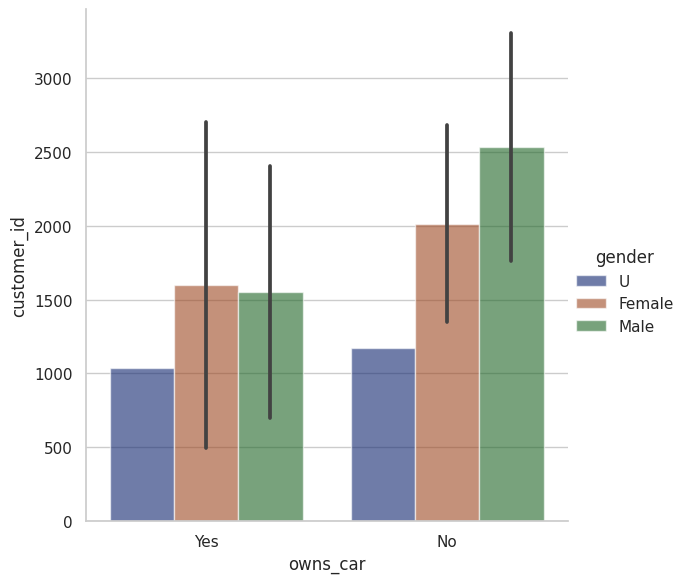

In [64]:
sns.set_theme(style="whitegrid")
sns.catplot(
    data= df_31_customer, kind="bar",
    x="owns_car", y="customer_id", hue="gender",
    errorbar="sd", palette="dark", alpha=.6, height=6);

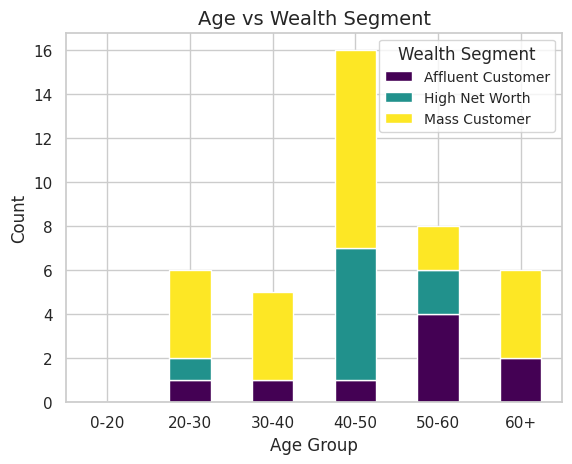

In [65]:
bins = [0,20, 30, 40, 50, 60, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']
df_48_customer['AgeGroup'] = pd.cut(df_48_customer['age'], bins=bins, labels=labels)
age_counts = df_48_customer['AgeGroup'].value_counts().sort_index()
df_48_customerpivot_df = df_48_customer.pivot_table(index='AgeGroup', columns='wealth_segment', aggfunc='size', fill_value=0)
# Create the stacked bar plot
df_48_customerpivot_df.plot(kind='bar', stacked=True, cmap='viridis')
# Customize the plot
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age vs Wealth Segment', fontsize=14)
plt.legend(title='Wealth Segment', fontsize=10)
plt.xticks(rotation=0)
plt.show();

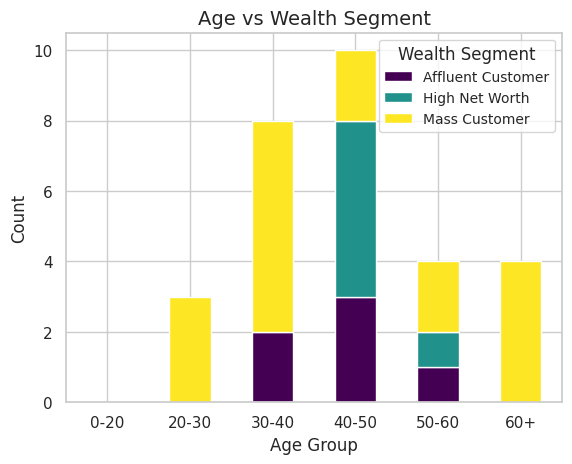

In [66]:
bins = [0,20, 30, 40, 50, 60, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']
df_31_customer['AgeGroup'] = pd.cut(df_31_customer['age'], bins=bins, labels=labels)
age_counts = df_31_customer['AgeGroup'].value_counts().sort_index()
df_31_customerpivot_df = df_31_customer.pivot_table(index='AgeGroup', columns='wealth_segment', aggfunc='size', fill_value=0)
# Create the stacked bar plot
df_31_customerpivot_df.plot(kind='bar', stacked=True, cmap='viridis')
# Customize the plot
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age vs Wealth Segment', fontsize=14)
plt.legend(title='Wealth Segment', fontsize=10)
plt.xticks(rotation=0)
plt.show();

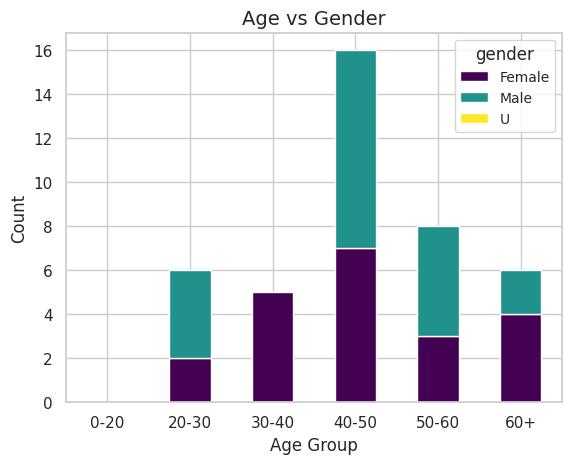

In [67]:
bins = [0,20, 30, 40, 50, 60, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']
df_48_customer['AgeGroup'] = pd.cut(df_48_customer['age'], bins=bins, labels=labels)
age_counts = df_48_customer['AgeGroup'].value_counts().sort_index()
df_48_c_pivot_df = df_48_customer.pivot_table(index='AgeGroup', columns='gender', aggfunc='size', fill_value=0)
# Create the stacked bar plot
df_48_c_pivot_df.plot(kind='bar', stacked=True, cmap='viridis')
# Customize the plot
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age vs Gender', fontsize=14)
plt.legend(title='gender', fontsize=10)
plt.xticks(rotation=0)
plt.show();

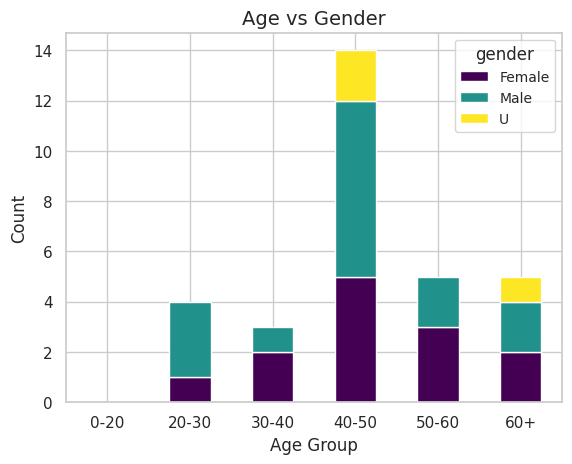

In [68]:
bins = [0,20, 30, 40, 50, 60, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']
df_31_customer['AgeGroup'] = pd.cut(df_48_customer['age'], bins=bins, labels=labels)
age_counts = df_31_customer['AgeGroup'].value_counts().sort_index()
df_31_c_pivot_df = df_31_customer.pivot_table(index='AgeGroup', columns='gender', aggfunc='size', fill_value=0)
# Create the stacked bar plot
df_31_c_pivot_df.plot(kind='bar', stacked=True, cmap='viridis')
# Customize the plot
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age vs Gender', fontsize=14)
plt.legend(title='gender', fontsize=10)
plt.xticks(rotation=0)
plt.show();